In [102]:
import matplotlib.pyplot as plt
import Swirling
from distributions import Circular, Parametric
from functions import Distance
import Chatoyant

from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

from IPython.display import Image

In [16]:
%reload_ext autoreload
%autoreload 2

In [89]:
scene = Swirling.Scene()
root = Swirling.Anchors(*Circular(4).uniform())
root.scale_by(2)

scene > root    
for c in root.childs:
    c.drawables = [Swirling.Polygon(4, size=2, linewidth=1)]

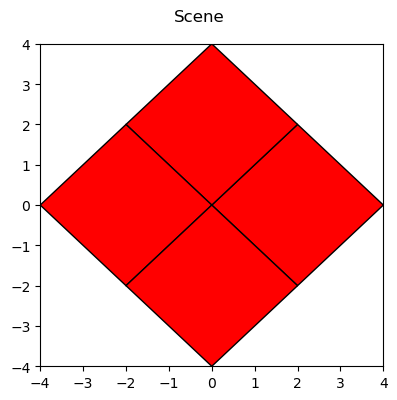

In [90]:
scene.quick_display(figsize=(4, 4), padding=2)    

In [91]:
def make_frame(t):
    ax.clear()
    ax.axis('off')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    
    scene.render(ax)
    
    if 0 < t < 1:
        root.rotate_by(4.5)
    
    if 1 <= t <=2 :
        for c in root.childs:
            c.rotate_drawables_by(-4.5)
            
    fig.tight_layout(pad=0.2)
    return mplfig_to_npimage(fig)


MoviePy - Building file rotating_squares.gif with imageio.


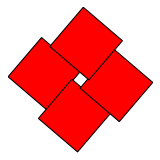

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2), dpi=75)

animation = VideoClip(make_frame, duration=2)
animation.write_gif('rotating_squares.gif', fps=20, verbose=True)

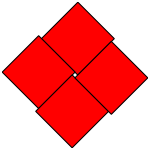

In [95]:
Image('rotating_squares.gif') 

MoviePy - Building file hexagons.gif with imageio.


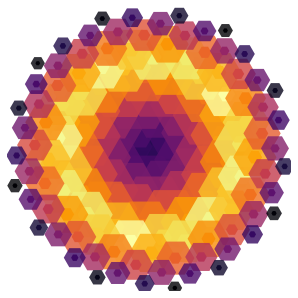

In [108]:
def hexagons():
    duration = 3
    fps = 50
    n_points = 150
    x, y = Parametric(n=n_points).sunflower(alpha=1)
    x *= 4
    y *= 4
    
    sizes = Distance(x, y).normal(sd=5) + 0.2
 
    # sizes = sizes[::-1]
    colors = Chatoyant.ColorMap().from_matplotlib('inferno', n=n_points//2)
    colors = (colors + colors.invert()).map_to_index(sizes)
    
    scene = Swirling.Scene()
    
    anchors = Swirling.Anchors(x, y)
    scene > anchors
    
    for a, c, s in zip(anchors.childs, colors.to_float_list(), sizes):
        p = Swirling.Polygon(6, linewidth=0, alpha = 0.8, size=s, facecolor=c)
        p2 = Swirling.Polygon(6, linewidth=0, alpha = 1, size=s/3, facecolor=c)

        a.drawables = [p, p2]
               
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=75)
    

    def make_frame(t):
        
        ax.clear()
        ax.axis('off')
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)

        scene.render(ax)
        
        idx = int(t * fps)
        cmap = colors.roll(idx).to_float_list()
        anchors.rotate_by(3.6)

        for a, c in zip(anchors.childs, cmap):
            for d in a.drawables:
                
                d.facecolor = c
                
        fig.tight_layout(pad=0.8)
        return mplfig_to_npimage(fig)
    
    animation = VideoClip(make_frame, duration=duration)
    animation.write_gif('hexagons.gif', fps=fps)

hexagons()

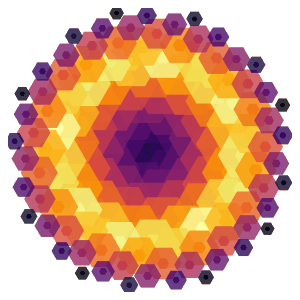

In [109]:
Image('hexagons.gif')